## Importing libraries


In [1]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras import Input
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical


## Loading dataset

In [2]:
dir1 = '../input/chest-xray-pneumonia/chest_xray/train'
dir2 = '../input/chest-xray-pneumonia/chest_xray/test'

In [3]:
dataset=[]
mapping={"PNEUMONIA":0,"NORMAL":1}
count=0

for file in os.listdir(dir1):
    path=os.path.join(dir1,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='grayscale', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        dataset.append([image,count])     
    count=count+1

In [4]:
testset=[]
mapping={"PNEUMONIA":0,"NORMAL":1}
count=0

for file in os.listdir(dir2):
    path=os.path.join(dir2,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='grayscale', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        testset.append([image,count])         
    count=count+1

In [5]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

## Exploring Dataset

In [6]:
print('Total number of images in training dataset :',len(data))
print('Number of images of NORMAL:',sum(labels0))
print('Number of images of PNEUMONIA :',len(data)-sum(labels0))


Total number of images in training dataset : 5216
Number of images of NORMAL: 1341
Number of images of PNEUMONIA : 3875


In [7]:
print('Total number of images in testing dataset :',len(test))
print('Number of images of NORMAL:',sum(testlabels0))
print('Number of images of PNEUMONIA :',len(test)-sum(testlabels0))

Total number of images in testing dataset : 624
Number of images of NORMAL: 234
Number of images of PNEUMONIA : 390


Text(0.5, 1.0, 'PNEUMONIA')

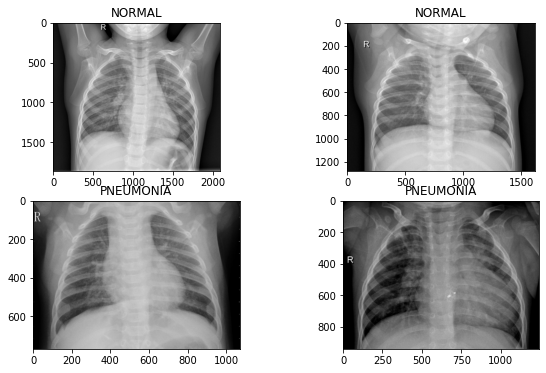

In [8]:
# Quick look to the images 

img_name = 'IM-0115-0001.jpeg'
img_normal = load_img('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/' + img_name)
img_name1 = 'IM-0122-0001.jpeg'
img_normal1 = load_img('../input/chest-xray-pneumonia/chest_xray/train/NORMAL/' + img_name1)

img_name_1 = 'person1000_virus_1681.jpeg'
img_pneumonia = load_img('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/' + img_name_1)
img_name_2 = 'person1002_bacteria_2933.jpeg'
img_pneumonia1 = load_img('../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/' + img_name_2)
fig, axs = plt.subplots(2,2,figsize=(10,6))
axs[0][0].imshow(img_normal)
axs[0][0].set_title("NORMAL")
axs[0][1].imshow(img_normal1)
axs[0][1].set_title("NORMAL")
axs[1][0].imshow(img_pneumonia)
axs[1][0].set_title("PNEUMONIA")
axs[1][1].imshow(img_pneumonia1)
axs[1][1].set_title("PNEUMONIA")

## Feature engineering

In [9]:
labels1=to_categorical(labels0)
X_train=np.array(data)
y_train=np.array(labels1)
print("Data Shape:{}\nTrain Labels shape: {}".format(X_train.shape,y_train.shape))
testlabels1=to_categorical(testlabels0)
X_test=np.array(test)
y_test=np.array(testlabels1)
print("Test Shape:{}\nTest Labels shape: {}".format(X_test.shape,y_test.shape))

Data Shape:(5216, 150, 150, 1)
Train Labels shape: (5216, 2)
Test Shape:(624, 150, 150, 1)
Test Labels shape: (624, 2)


## ML model : 

In [10]:

trainx,k,trainy,k1=train_test_split(X_train,y_train,test_size=0.0001,random_state=44)
testx,k2,testy,k3=train_test_split(X_test,y_test,test_size=0.001,random_state=44)
trainx.resize(5215,22500)
testx.resize(623,22500)
trainx.shape


(5215, 22500)

In [11]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1,max_iter=50,learning_rate='adaptive').fit(trainx,trainy)
clf.score(testx, testy)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8138041733547352

Accuracy of the model : 81.38041733547352


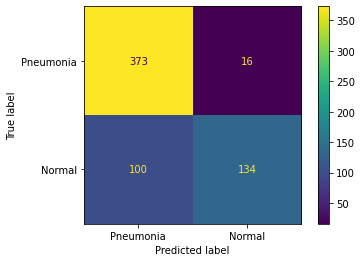

In [12]:
predy = clf.predict(testx)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(testy.argmax(axis=1),predy.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Pneumonia','Normal'])
disp.plot()
print("Accuracy of the model :",100*clf.score(testx,testy))

In [13]:
from sklearn.metrics import classification_report
target_names = ['Pneumonia', 'Normal']
print(classification_report(testy.argmax(axis=1),predy.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

   Pneumonia       0.79      0.96      0.87       389
      Normal       0.89      0.57      0.70       234

    accuracy                           0.81       623
   macro avg       0.84      0.77      0.78       623
weighted avg       0.83      0.81      0.80       623



## Testing model

Pneumonia


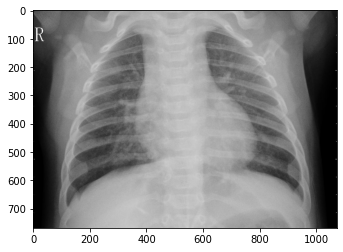

In [14]:
pim='../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg'
image=load_img(pim, grayscale=False, color_mode='grayscale', target_size=(150,150))
image=img_to_array(image)
image=image/255.0
x=clf.predict(image.reshape(1,22500)).argmax(axis=1)[0]
if(x==0):
    print('Pneumonia')
else: 
    print('Normal')
plt.imshow(load_img(pim))

Normal


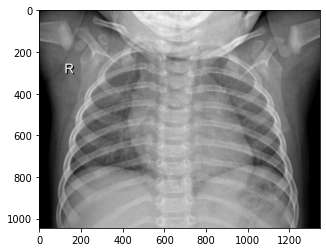

In [15]:
pim='../input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0137-0001.jpeg'
image=load_img(pim, grayscale=False, color_mode='grayscale', target_size=(150,150))
image=img_to_array(image)
image=image/255.0
x=clf.predict(image.reshape(1,22500)).argmax(axis=1)[0]
if(x==0):
    print('Pneumonia')
else: 
    print('Normal')
plt.imshow(load_img(pim))